In [44]:
# 今日の日付
today_text = '2014-01-01'

In [45]:
#task     予定開始日    予定終了日    実績開始日    実績完了日    進捗率
schedule_text = """
A         2012-11-01    2012-12-31    2012-11-01    2012-12-31    100
B         2013-01-01    2013-03-14    2013-01-01    2013-03-14    100
C         2013-03-15    2014-04-30    2013-03-15    -              70
D         2013-05-01    2013-06-30    2013-05-01    2013-06-30    100
E         2013-07-01    2013-08-31    2013-07-01    2013-08-31    100
F1        2013-09-01    2013-10-31    2013-09-01    2013-10-31    100
F2        2013-09-01    2014-01-17    2013-09-01    -              80
F3        2013-09-01    2014-01-30    2013-09-01    -              80
F4        2013-09-01    2014-03-31    2013-09-01    -              60
G1        2013-11-01    2013-11-27    2013-11-01    2013-11-27    100
G2        2013-11-01    2014-01-17    2013-11-01    -              80
L         2013-11-28    2013-12-19    2013-11-28    -               0
M         2013-11-28    2014-01-17    2013-11-28    -              60
N         2013-12-04    2014-03-02    2013-12-04    -              30
O         2013-12-20    2014-01-17    2013-12-20    -              30
P         2013-12-20    2014-02-16    2013-12-20    -              20
Q         2014-01-05    2014-01-13    2013-12-25    -             100
R         2014-01-18    2014-01-30    2013-12-18    -              50
S         2014-01-31    2014-03-31    -             -               0
T         2014-03-01    2014-04-28    -             -               0
"""

In [46]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import pandas
import locale
%matplotlib inline

locale.setlocale(locale.LC_ALL, "")
#matplotlib.rcParams['font.family'] = 'IPAPGothic'

'en_US.UTF-8'

In [47]:
datefmt = "%Y-%m-%d"

def scan_date(text):
    try:
        if text == '-':
            return None
        else:
            return datetime.datetime.strptime(text, datefmt)
    except ValueError as e:
        raise e

today = scan_date(today_text)

In [48]:
columns = [
    "label",
    "planned_start", "planned_end",
    "actual_start", "actual_end",
    "progress",
]

def parse_row(row):
    return \
    [row[0],
     scan_date(row[1]),
     scan_date(row[2]),
     scan_date(row[3]),
     scan_date(row[4]),
     int(row[5]) / 100.0]

def parse_schedule(text):
    rows = [x.split() for x in text.split('\n')]
    rows = [parse_row(x) for x in rows if len(x) == 6]
    return pandas.DataFrame.from_records(rows, columns=columns)

In [78]:
schedule = parse_schedule(schedule_text)
schedule

,label,planned_start,planned_end,actual_start,actual_end,progress
0,A,2012-11-01,2012-12-31,2012-11-01,2012-12-31,1.0
1,B,2013-01-01,2013-03-14,2013-01-01,2013-03-14,1.0
2,C,2013-03-15,2014-04-30,2013-03-15,NaT,0.7
3,D,2013-05-01,2013-06-30,2013-05-01,2013-06-30,1.0
4,E,2013-07-01,2013-08-31,2013-07-01,2013-08-31,1.0
5,F1,2013-09-01,2013-10-31,2013-09-01,2013-10-31,1.0
6,F2,2013-09-01,2014-01-17,2013-09-01,NaT,0.8
7,F3,2013-09-01,2014-01-30,2013-09-01,NaT,0.8
8,F4,2013-09-01,2014-03-31,2013-09-01,NaT,0.6
9,G1,2013-11-01,2013-11-27,2013-11-01,2013-11-27,1.0


In [123]:
def plot_gantt(sched):
    fig, ax = plt.subplots(figsize=(10,10))
    # 計画値
    xsched = sched.copy()
    xsched['planned_end'] = sched['planned_end'] + datetime.timedelta(1)
    ax.hlines(
        xsched.index - 0.2,
        xsched['planned_start'].values,
        xsched['planned_end'].values,
        linewidth=3, color='black', label="計画")
    # 実績値
    xsched = sched[pandas.notnull(xsched['actual_start'])].copy()
    xsched['actual_end'] = xsched['actual_end'] + datetime.timedelta(1)
    xsched['actual_end'] = xsched['actual_end'].fillna(today)
    ax.hlines(
        xsched.index + 0.2,
        xsched['actual_start'].values,
        xsched['actual_end'].values,
        linewidth=3, color='red', label="実績")
    # 進捗
    xsched = sched.copy()
    xsched['planned_end'] = sched['planned_end'] + datetime.timedelta(1)
    xsched['progress_end'] = [
        row['planned_start'] + (row['planned_end'] - row['planned_start']).to_pytimedelta() * row['progress']
        for index, row in xsched.iterrows()]
    xsched['lightening_date'] = [
        row['progress_end']
        if row['progress'] > 0 and row['progress'] < 1
        or row['progress'] > 0 and row['progress_end'] > today
        or row['progress'] < 1 and row['progress_end'] < today
        else today
        for index, row in xsched.iterrows()]
    # イナズマ線
    ax.hlines(
        xsched.index,
        xsched['planned_start'].values,
        xsched['progress_end'].values,
        linewidth=3, color='blue', label="進捗")
    lt_x = [v for x in xsched['lightening_date'].values for v in [today, x, today]]
    lt_y = [v for x in xsched.index.values for v in [x-0.3, x, x+0.3]]
    ax.plot(lt_x, lt_y, linewidth=1, color='blue')
    # 時間軸の設定
    ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y年%m月'))
    ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y年%m月'))
    ax.xaxis.set_major_locator(pltdates.MonthLocator())
    ax.xaxis.set_minor_locator(pltdates.WeekdayLocator(byweekday=pltdates.MO))
    # タスク軸の設定
    ax.xaxis.grid(b=True)
    ax.yaxis.set_ticklabels(sched['label'])
    ax.yaxis.set_ticks(sched.index)
    ax.yaxis.grid(b=True)
    ax.set_ylim(len(sched), -1)
    # 凡例
    ax.legend(loc='lower left')
    fig.autofmt_xdate()
    
    plt.show()

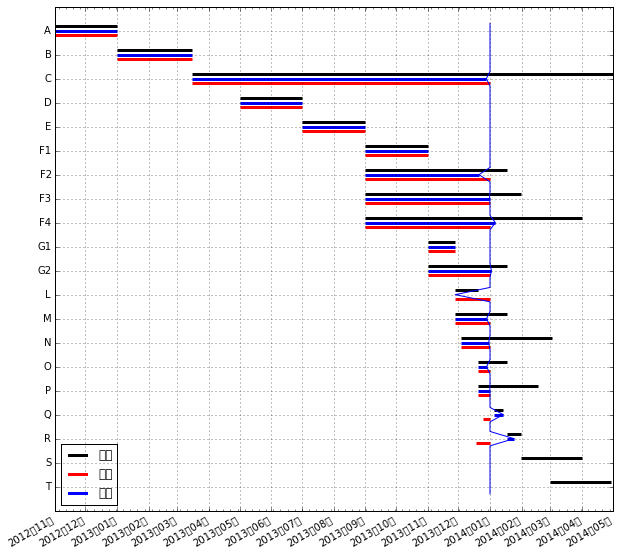

In [124]:
plot_gantt(schedule);